<a href="https://colab.research.google.com/github/JenifaMehjabin/Jeni_dataAnalysis/blob/main/EDA_on_factors_influencing_cloth_factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exploratory data analysis on the factors influencing clothing purchase intention***

In [4]:
from google.colab import files
uploaded = files.upload()

Saving shopping_trends.csv to shopping_trends.csv


In [10]:
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

print(data.info())
print(data.describe())

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)

scaler = MinMaxScaler()
numeric_columns = ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

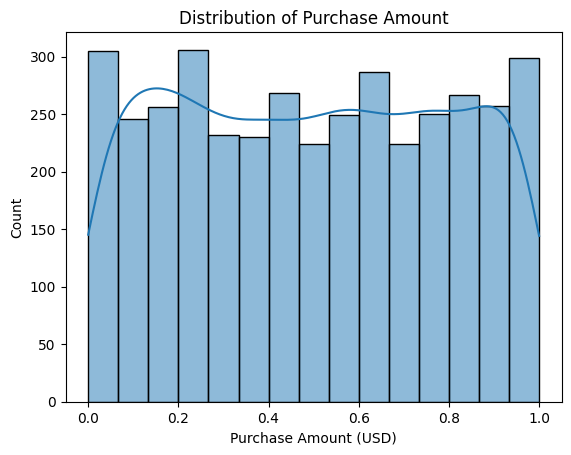

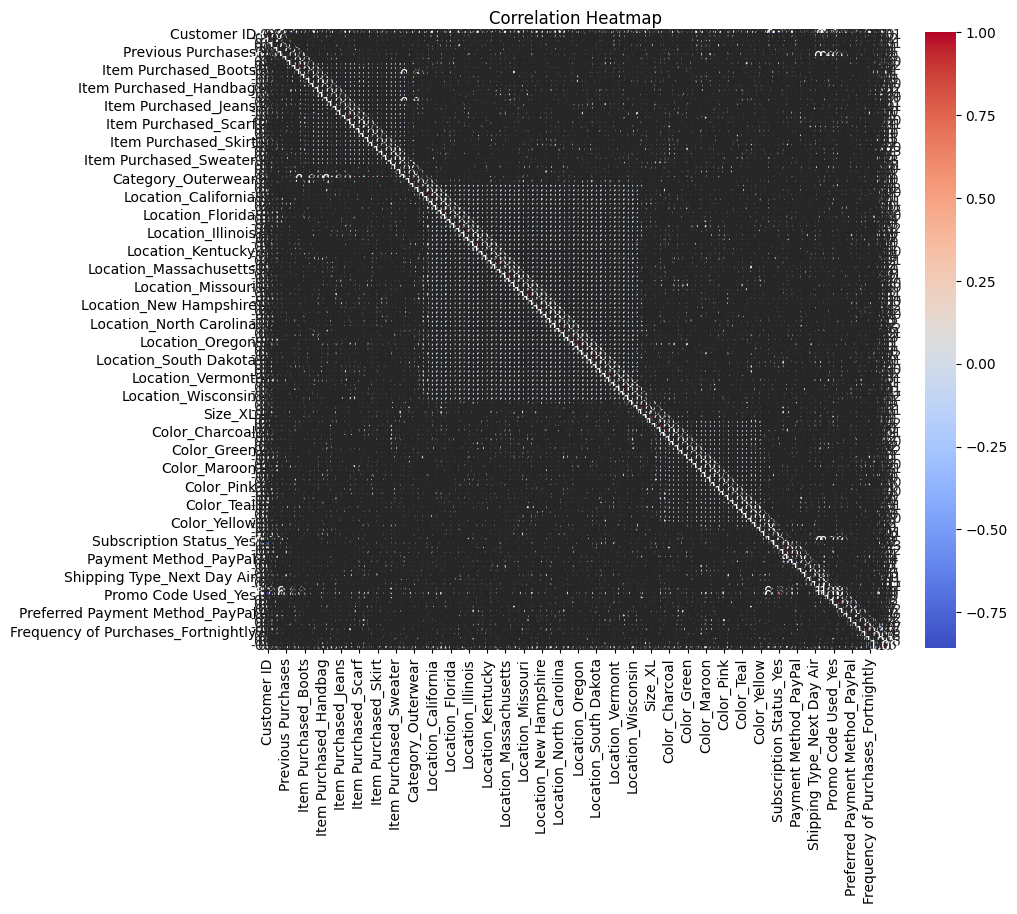

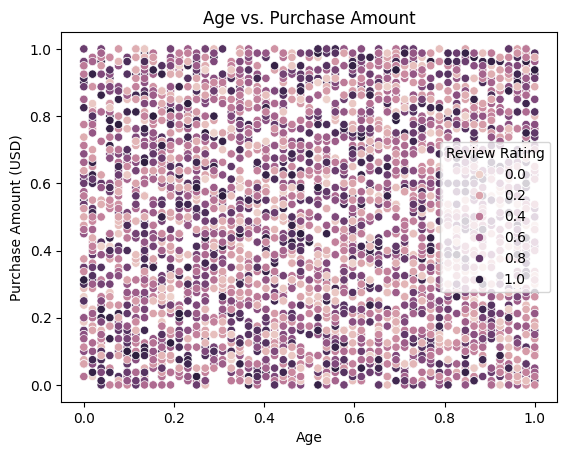

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of 'Purchase Amount (USD)' (proxy for purchase intention)
sns.histplot(data['Purchase Amount (USD)'], kde=True)
plt.title('Distribution of Purchase Amount')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot for key variables
sns.scatterplot(data=data, x='Age', y='Purchase Amount (USD)', hue='Review Rating')
plt.title('Age vs. Purchase Amount')
plt.show()


## **Using Random Forest model**

Accuracy: 0.5115384615384615
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.55      0.55       420
           1       0.47      0.47      0.47       360

    accuracy                           0.51       780
   macro avg       0.51      0.51      0.51       780
weighted avg       0.51      0.51      0.51       780



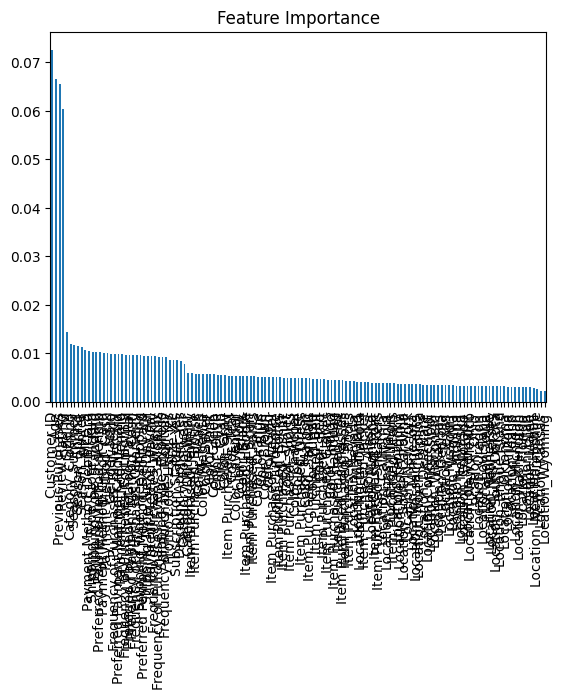

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = data.drop(columns=['Purchase Amount (USD)'])  # Update with target column
y = (data['Purchase Amount (USD)'] > 0.5).astype(int)  # Binarize target for classification

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()


## **Using Logistic Regression**

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.5102564102564102
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.50      0.53       420
           1       0.47      0.52      0.49       360

    accuracy                           0.51       780
   macro avg       0.51      0.51      0.51       780
weighted avg       0.51      0.51      0.51       780

Confusion Matrix:
 [[212 208]
 [174 186]]


## **Using Support Vector Machine**

In [14]:
from sklearn.svm import SVC

# Support Vector Machine
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.4935897435897436
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.51      0.52       420
           1       0.45      0.47      0.46       360

    accuracy                           0.49       780
   macro avg       0.49      0.49      0.49       780
weighted avg       0.50      0.49      0.49       780

Confusion Matrix:
 [[215 205]
 [190 170]]


## **Using KNeighborsClassifier**

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.4666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.46      0.48       420
           1       0.43      0.47      0.45       360

    accuracy                           0.47       780
   macro avg       0.47      0.47      0.47       780
weighted avg       0.47      0.47      0.47       780

Confusion Matrix:
 [[194 226]
 [190 170]]


## **Using Decision Tree**

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_decision_tree = decision_tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_decision_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decision_tree))


Decision Tree Accuracy: 0.48205128205128206
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.50      0.51       420
           1       0.44      0.46      0.45       360

    accuracy                           0.48       780
   macro avg       0.48      0.48      0.48       780
weighted avg       0.48      0.48      0.48       780

Confusion Matrix:
 [[211 209]
 [195 165]]


## **Predictive Modeling with all above Models**



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target
X = data.drop(columns=['Purchase Amount (USD)'])  # Update with target column
y = (data['Purchase Amount (USD)'] > 0.5).astype(int)  # Binarize target for classification

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"\nTraining and Evaluating: {model_name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Training and Evaluating: Logistic Regression
Accuracy: 0.5103
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.50      0.53       420
           1       0.47      0.52      0.49       360

    accuracy                           0.51       780
   macro avg       0.51      0.51      0.51       780
weighted avg       0.51      0.51      0.51       780

Confusion Matrix:
[[212 208]
 [174 186]]

Training and Evaluating: SVM
Accuracy: 0.4936
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       420
           1       0.45      0.47      0.46       360

    accuracy                           0.49       780
   macro avg       0.49      0.49      0.49       780
weighted avg       0.50      0.49      0.49       780

Confusion Matrix:
[[215 205]
 [190 170]]

Training and Evaluating: KNN
Accuracy: 0.4667
Classification Report:
              precision    recall  f1-

## **Models Comparison**

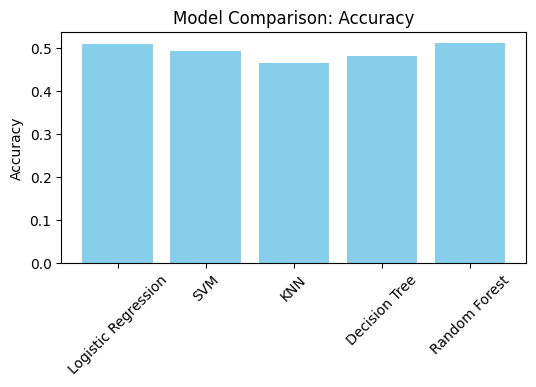

In [21]:
import matplotlib.pyplot as plt

# Store accuracy results
accuracy_results = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy_results[model_name] = accuracy_score(y_test, y_pred)

# Plot the results
plt.figure(figsize=(6, 3))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()



## **Improve Model Performance**

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=10, min_sa

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy: 0.5148717948717948


In [30]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.5269230769230769
